In [1]:
cd D:\DATA SCIENCE PROJECTS\DATASETS

D:\DATA SCIENCE PROJECTS\DATASETS


Content of the Notebook

Part 1: Exploratory Data Analysis

1.Analysis of features

2.Finding Relationship between features

3.Making a new feature for modelling

Part 2:Feature Engineering and Data cleaning

Converting Features into suitable form of modelling

1.Continuous Features

2.Categorical Features

Part 3:Predictive Modelling

1.Modelling

2.Cross Validation

3.Ensembling

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
gender_submission=pd.read_csv("gender_submission (1).csv")

In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


We can check that survived column is not in test data
Which it means 'survived' is our target value

In [7]:
#Save our target values as name label

label=train['Survived']

In [8]:
#Data describe

train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hakkarainen, Mr. Pekka Pietari",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is missing values in "age","cabin","embarked

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Also check the unique values in each column

dict={}
for i in list(train.columns):
    dict[i]=train[i].value_counts().shape[0]
pd.DataFrame(dict,index=['unique count']).transpose()

,unique count
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


First drop the unnecessary columns



In [12]:
# Drop the columns that are notuseful
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


Now we will seperate our column into categorical features and continuous features

Categorical features:Sex,Parch,Embarked Ordinal Featues :Pclass Continuous Feature:age,fare Discrete feature:SibSip Target Feature:Survived



# part 1:Exploratory Data Analysis


Remember that fillout that missing values of age,embarked columns



In [13]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


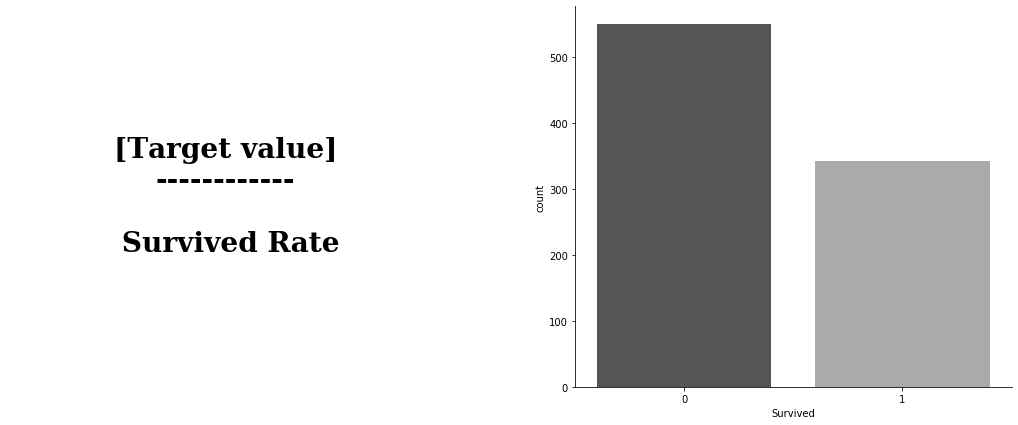

In [14]:
fig=plt.figure(figsize=(18,7))
gs=fig.add_gridspec(1,2)
gs.update(wspace=0.3,hspace=0.15)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

#title
ax0.text(0.5,0.5,"[Target value]\n------------\n\n Survived Rate",
        horizontalalignment='center',
        verticalalignment='center',
         fontsize=28,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False,bottom=False)

#Survived count

ax_survived=ax1
sns.countplot(x='Survived',color='grey',data=train,ax=ax_survived,palette='gist_gray')
sns.despine()

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

plt.show()

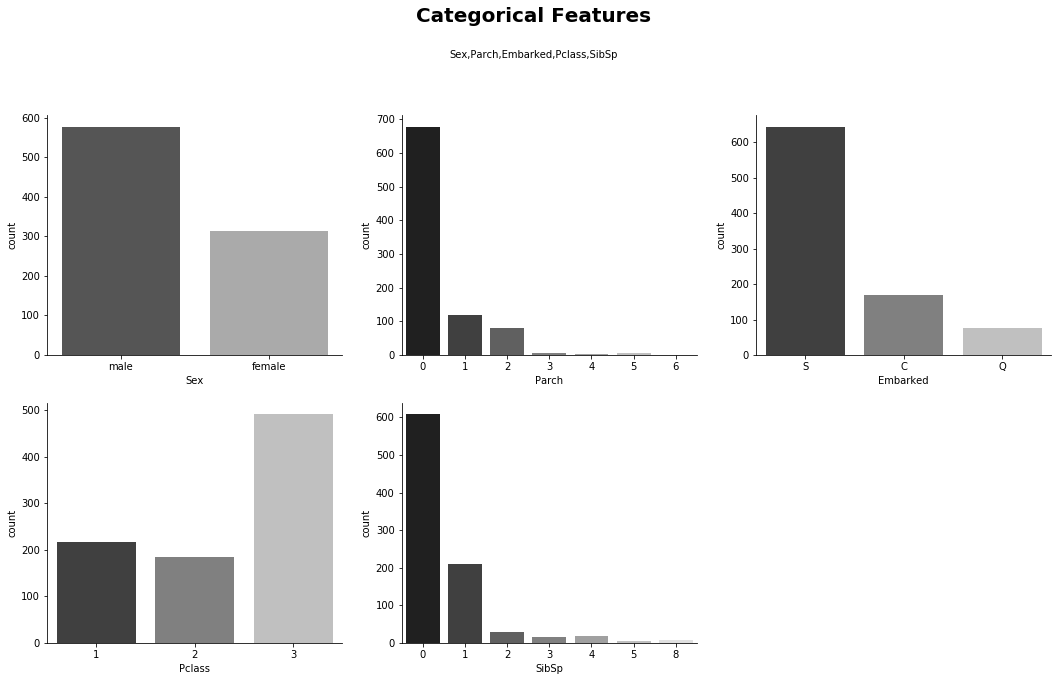

In [15]:
#sex,parch,Embarked,Pclss,SibSip

fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])

ax_sex=ax0
sns.countplot(x='Sex',data=train,ax=ax_sex,palette='gist_gray')
sns.despine()

ax_parch=ax1
sns.countplot(x='Parch',data=train,ax=ax_parch,palette='gist_gray')
sns.despine()

ax_embarked=ax2
sns.countplot(x='Embarked',data=train,ax=ax_embarked,palette='gist_gray')
sns.despine()

ax_Pclass=ax3
sns.countplot(x='Pclass',data=train,ax=ax_Pclass,palette='gist_gray')
sns.despine()

ax_SibSp=ax4
sns.countplot(x='SibSp',data=train,ax=ax_SibSp,palette='gist_gray')
sns.despine()

#Title and subtitle
fig.suptitle('Categorical Features',fontweight='bold',fontsize=20)
fig.text(s='Sex,Parch,Embarked,Pclass,SibSp',x=0.5,y=0.94,ha='center',va='top')
plt.show()

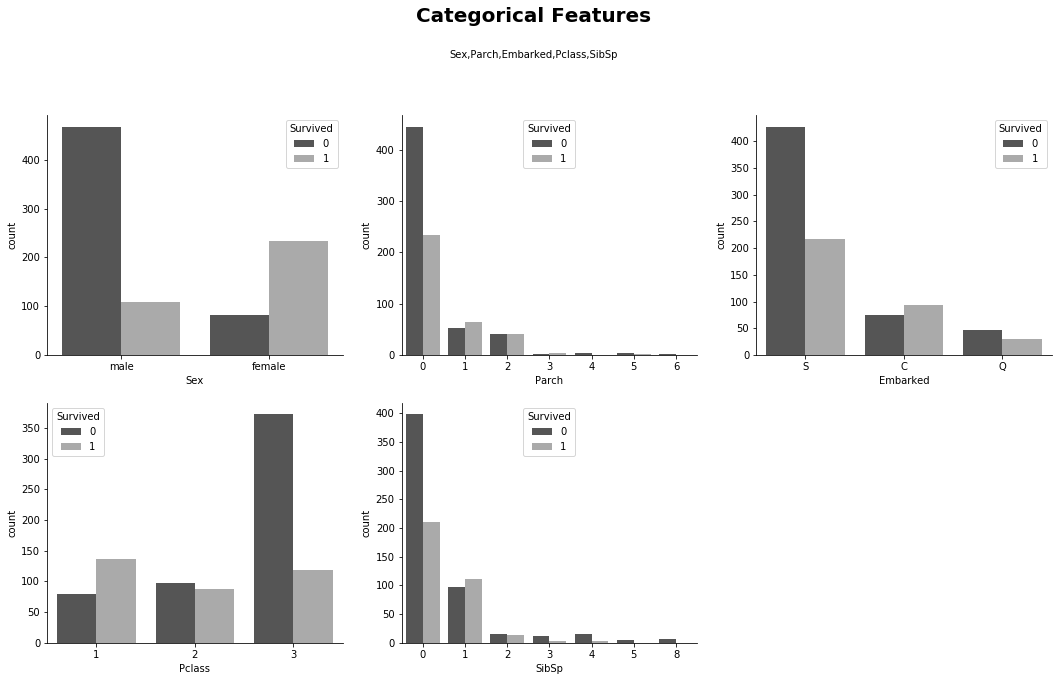

In [16]:
#sex,parch,Embarked,Pclss,SibSip

fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])

ax_sex=ax0
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax_sex,palette='gist_gray')
sns.despine()

ax_parch=ax1
sns.countplot(x='Parch',hue='Survived',data=train,ax=ax_parch,palette='gist_gray')
sns.despine()

ax_embarked=ax2
sns.countplot(x='Embarked',hue='Survived',data=train,ax=ax_embarked,palette='gist_gray')
sns.despine()

ax_Pclass=ax3
sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax_Pclass,palette='gist_gray')
sns.despine()

ax_SibSp=ax4
sns.countplot(x='SibSp',hue='Survived',data=train,ax=ax_SibSp,palette='gist_gray')
sns.despine()

#Title and subtitle
fig.suptitle('Categorical Features',fontweight='bold',fontsize=20)
fig.text(s='Sex,Parch,Embarked,Pclass,SibSp',x=0.5,y=0.94,ha='center',va='top')
plt.show()

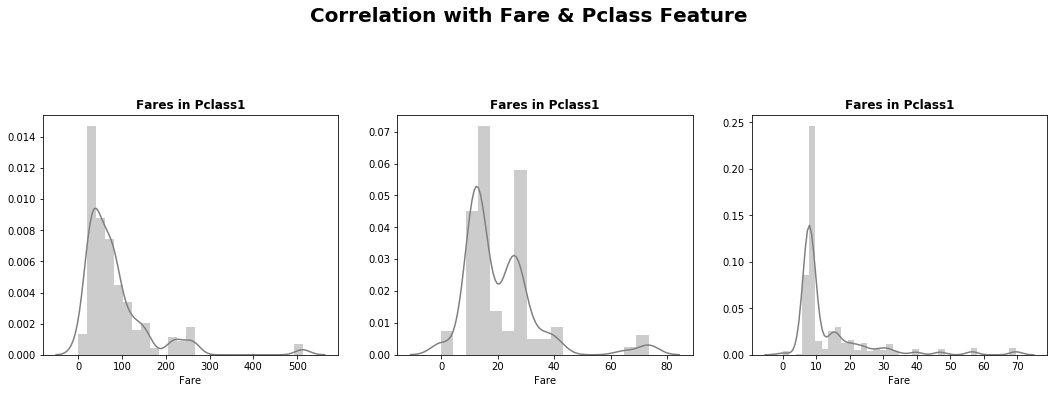

In [17]:
#sex,parch,Embarked,Pclss,SibSip

fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])

ax_sex=ax0
sns.distplot(train[train['Pclass']==1].Fare,ax=ax_sex,color='gray')
ax_sex.set_title('Fares in Pclass1',fontweight='bold')

ax_sex2=ax1
sns.distplot(train[train['Pclass']==2].Fare,ax=ax_sex2,color='gray')
ax_sex2.set_title('Fares in Pclass1',fontweight='bold')

ax_sex3=ax2
sns.distplot(train[train['Pclass']==3].Fare,ax=ax_sex3,color='gray')
ax_sex3.set_title('Fares in Pclass1',fontweight='bold')

#Title & subtitle
fig.suptitle('Correlation with Fare & Pclass Feature',fontweight='bold',fontsize=20)
plt.show();

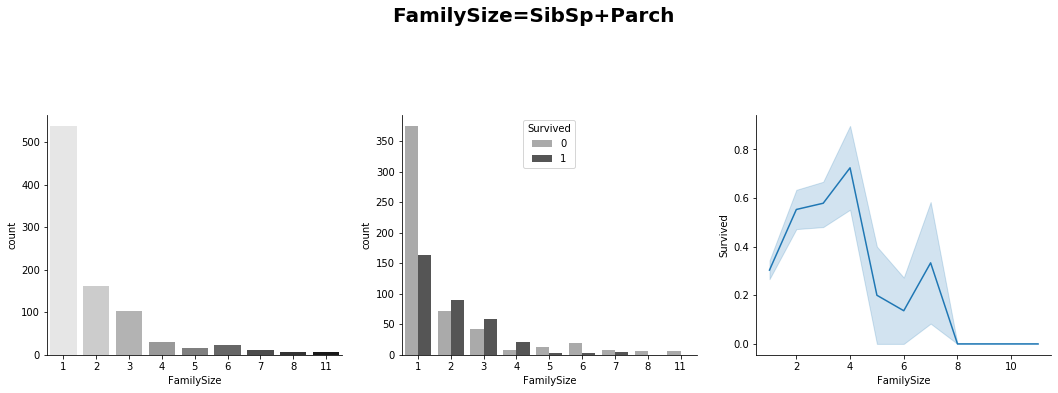

In [18]:
#Create a new feature with SibSp & Parch
train['FamilySize']=train['SibSp']+train['Parch']+1

#sex,parch,embarked,pclass,sibsp
fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])

sns.countplot(x='FamilySize',data=train,ax=ax0,palette='gist_gray_r')
sns.despine()

sns.countplot(x='FamilySize',hue='Survived',data=train,ax=ax1,palette='gist_gray_r')
sns.despine()

sns.lineplot(x='FamilySize',y='Survived',data=train,ax=ax2,palette='gist_gray_r')
sns.despine()

#title and sub title
fig.suptitle('FamilySize=SibSp+Parch',fontweight='bold',fontsize=20)
plt.show();

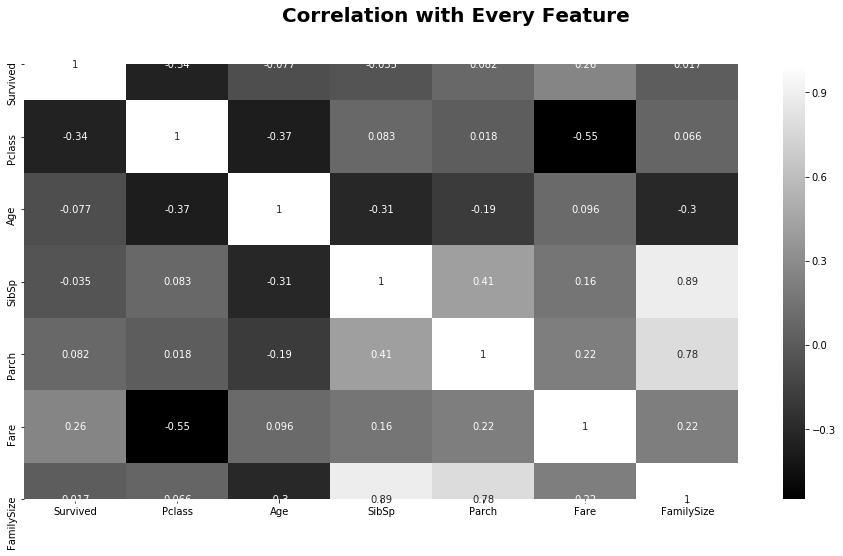

In [19]:
fig=plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,cmap='gray')
fig.suptitle('Correlation with Every Feature',fontweight='bold',fontsize=20)
plt.show()

In [20]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2


# conclusion of EDA:
 
 Pclass:The first class passengers have lot more chance to survive.3rd class passengers survive rate is very low.
 
 

# Part2:Feature Engineering and Data Cleaning

1) Data cleaning

In [21]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
dtype: int64

Fillout the Embarked missing value with S.Because maximum passengers are boarded from port S

In [22]:
#Filling embarked missing value

train['Embarked'].fillna('S',inplace=True)
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
dtype: int64

Age distribution same as male and female population

In [27]:
## Fill Age with the median age of similar rows according to pclass and sibsp
#Index of NaN age rows
index_NaN_age=list(train["Age"][train["Age"].isnull()].index)

for i in index_NaN_age:
    age_med=train["Age"].median()
    age_pred=train["Age"][((train["SibSp"]==train.iloc[i]["SibSp"])&
                         (train["Parch"]==train.iloc[i]["Parch"])&
                          (train["Pclass"]==train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        train["Age"].iloc[i]=age_pred
    else:
        train['Age'].iloc[i]=age_med

In [28]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

2) Feature Engineering

In [29]:
train.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
dtype: object

Categorical and Continuous Features

Categorical Feature:one hot encoding

Continuous Features:StandardScaler

In [30]:
con_columns=[c for c,t in zip(train.dtypes.index,train.dtypes)if t=='float64']

cat_columns=[c for c,t in zip(train.dtypes.index,train.dtypes)if t=='object']

print('Continuous columns:',con_columns)
print('Categorical columns:',cat_columns)

Continuous columns: ['Age', 'Fare']
Categorical columns: ['Sex', 'Embarked']


1) Age and Fare continuous features-StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train[con_columns]=scaler.fit_transform(train[con_columns])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,-0.545734,1,0,-0.502445,S,2
1,1,1,female,0.655962,1,0,0.786845,C,2
2,1,3,female,-0.245310,0,0,-0.488854,S,1
3,1,1,female,0.430644,1,0,0.420730,S,2
4,0,3,male,0.430644,0,0,-0.486337,S,1


2) sex,Embarked-categorical features:One hot encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe.fit(train[cat_columns])

#checkout features
ohe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [34]:
#put the new column in our data

ohe_columns=list()
for lst in ohe.categories_:
    ohe_columns+=lst.tolist()
new_train=pd.DataFrame(ohe.transform(train[cat_columns]),columns=ohe_columns)

In [35]:
new_train.head()

,female,male,C,Q,S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [36]:
#concat Scaling and encoding features

train=pd.concat([train,new_train],axis=1)

#remove previous categorical featurs

train=train.drop(columns=cat_columns)

#check

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,female,male,C,Q,S
0,0,3,-0.545734,1,0,-0.502445,2,0.0,1.0,0.0,0.0,1.0
1,1,1,0.655962,1,0,0.786845,2,1.0,0.0,1.0,0.0,0.0
2,1,3,-0.245310,0,0,-0.488854,1,1.0,0.0,0.0,0.0,1.0
3,1,1,0.430644,1,0,0.420730,2,1.0,0.0,0.0,0.0,1.0
4,0,3,0.430644,0,0,-0.486337,1,0.0,1.0,0.0,0.0,1.0


3)Pclass


In [37]:
#Use dummies for Pclass

pclass_columns=['Pclass']
train=pd.get_dummies(data=train,columns=pclass_columns)
train.head()

,Survived,Age,SibSp,Parch,Fare,FamilySize,female,male,C,Q,S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.545734,1,0,-0.502445,2,0.0,1.0,0.0,0.0,1.0,0,0,1
1,1,0.655962,1,0,0.786845,2,1.0,0.0,1.0,0.0,0.0,1,0,0
2,1,-0.245310,0,0,-0.488854,1,1.0,0.0,0.0,0.0,1.0,0,0,1
3,1,0.430644,1,0,0.420730,2,1.0,0.0,0.0,0.0,1.0,1,0,0
4,0,0.430644,0,0,-0.486337,1,0.0,1.0,0.0,0.0,1.0,0,0,1


4)[SibSp+Parch]=FamilySize

In [38]:
# create new feature of familysize

train['single']=train['FamilySize'].map(lambda s:1 if s==1 else 0)
train['small']=train['FamilySize'].map(lambda s:1 if s==2 else 0)
train['median']=train['FamilySize'].map(lambda s:1 if 3>=s<=4 else 0)
train['large']=train['FamilySize'].map(lambda s:1 if s>=5 else 0)

In [39]:
train.head()

,Survived,Age,SibSp,Parch,Fare,FamilySize,female,male,C,Q,S,Pclass_1,Pclass_2,Pclass_3,single,small,median,large
0,0,-0.545734,1,0,-0.502445,2,0.0,1.0,0.0,0.0,1.0,0,0,1,0,1,1,0
1,1,0.655962,1,0,0.786845,2,1.0,0.0,1.0,0.0,0.0,1,0,0,0,1,1,0
2,1,-0.245310,0,0,-0.488854,1,1.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,0
3,1,0.430644,1,0,0.420730,2,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,1,0
4,0,0.430644,0,0,-0.486337,1,0.0,1.0,0.0,0.0,1.0,0,0,1,1,0,1,0


# Part3:Predictive Modelling

Logistic Regression
Support Vector Machines
RandomForest
KNeighborClassifier

In [41]:
x=train.drop('Survived',axis=1).values
y=train['Survived'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=46,shuffle=True)
x_valid,x_test,y_valid,y_test=train_test_split(x_test,y_test,test_size=0.4,random_state=46,shuffle=True)


In [43]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [45]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_valid)

print(f"Logistic Regression F1 Score:{f1_score(y_valid,y_pred,average='micro')}")

Logistic Regression F1 Score:0.8317757009345794


In [46]:
#Support vector Machine

svc=SVC(probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_valid)
print(f"Support Vector Machine F1 Score:{f1_score(y_valid,y_pred,average='micro')}")

Support Vector Machine F1 Score:0.8411214953271028


In [47]:
#Random Forest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_valid)
print(f"RandomForestClassifier F1 Score:{f1_score(y_valid,y_pred,average='micro')}")

RandomForestClassifier F1 Score:0.7850467289719625


In [48]:
#KNeighbors classifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_valid)
print(f"KNeighborsClassifier F1 Score:{f1_score(y_valid,y_pred,average='micro')}")

KNeighborsClassifier F1 Score:0.7990654205607477


CROSS VALIDATION:

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold=KFold(n_splits=10,random_state=2020,shuffle=True)
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression',
            'SVC',
            'RandomForest',
            'KNeighbors']
models=[LogisticRegression(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in models:
    model=i
    cv_result=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'std':std},index=classifiers)
new_models_dataframe2

,CV Mean,std
Logistic Regression,0.812547,0.051819
SVC,0.823733,0.046499
RandomForest,0.796792,0.048509
KNeighbors,0.796804,0.046895


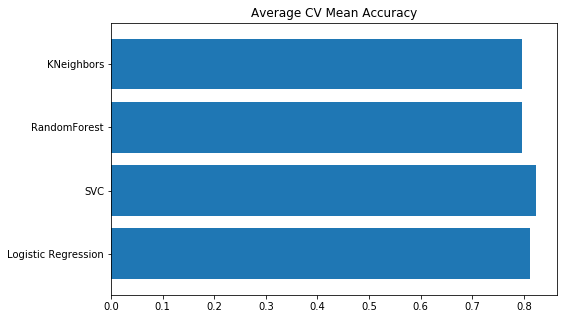

In [53]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# Ensembling

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,x,y,cv=10,scoring='accuracy')
print("The cross validated score for AdaBoost is:",result.mean())

The cross validated score for AdaBoost is: 0.8093215866530473
